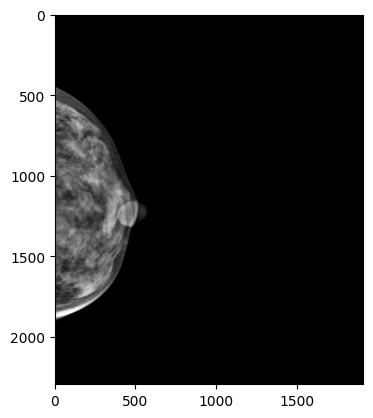

In [3]:
import pydicom
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = "./datasets/TheChineseMammographyDatabase/CMMD/D1-0002/07-18-2010-NA-NA-49231/1.000000-NA-45313/1-1.dcm"

img = pydicom.dcmread(path)
# pixel_sign = img[('0028', '1041')].value # Not this value
# img.PhotometricInterpretation = 'YBR_FULL'
data = img.pixel_array
data = data - np.min(data)
if np.max(data) != 0:
    data = data / np.max(data)
data = (data * 255).astype(np.uint8)
if img.PhotometricInterpretation == "MONOCHROME1":
    data = 255 - data
gray_image = data
plt.imshow(gray_image, cmap='gray')

In [5]:
print(gray_image.shape)

(2294, 1914)


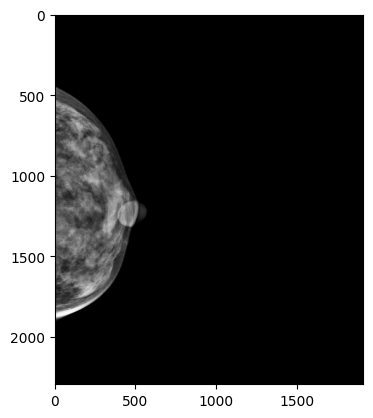

In [4]:
image = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)
plt.imshow(image)

In [6]:
print(image.shape)

(2294, 1914, 3)


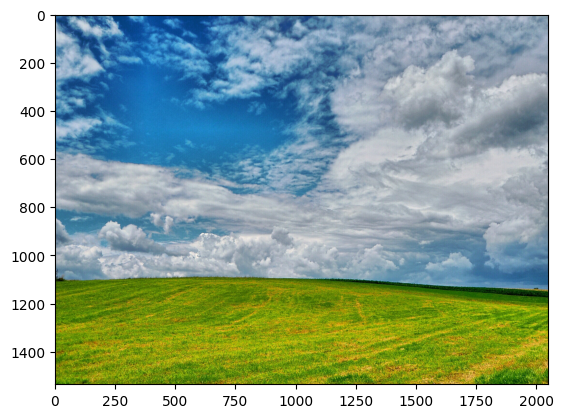

In [9]:
import cv2
import matplotlib.pyplot as plt

path = "./landscape.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
import numpy as np


def space_to_depth(x, block_size):
    """
    Re-arranges blocks of spatial data into depth.

    Args:
    x: np.ndarray of shape (height, width, depth)
    block_size: int, the size of the spatial block.

    Returns:
    np.ndarray of shape (batch_size, height // block_size, width // block_size, depth * (block_size ** 2))
    """
    x = np.asarray(x)
    height, width, depth = x.shape
    if height % block_size != 0 or width % block_size != 0:
        raise ValueError("The height and width of the input tensor must be divisible by block_size.")

    new_height = height // block_size
    new_width = width // block_size
    new_depth = depth * (block_size ** 2)

    # Reshape and transpose to interleave the spatial blocks into depth
    x = x.reshape(new_height, block_size, new_width, block_size, depth)
    x = np.swapaxes(x, 1, 2).reshape(new_height, new_width, new_depth)
    return x

def depth_to_space(x, block_size):
    """
    Re-arranges data from depth into blocks of spatial data.

    Args:
    x: np.ndarray of shape (height, width, depth)
    block_size: int, the size of the spatial block.

    Returns:
    np.ndarray of shape (batch_size, height * block_size, width * block_size, depth // (block_size ** 2))
    """
    x = np.asarray(x)
    height, width, depth = x.shape
    new_depth = depth // (block_size ** 2)
    if depth % (block_size ** 2) != 0:
        raise ValueError("The depth of the input tensor must be divisible by (block_size ** 2).")

    # Reshape and transpose to interleave the blocks
    x = x.reshape(height, width, block_size, block_size, new_depth)
    x = np.swapaxes(x, 1, 2).reshape(height * block_size, width * block_size, new_depth)
    return x

(1536, 2048, 3) (768, 1024, 12)


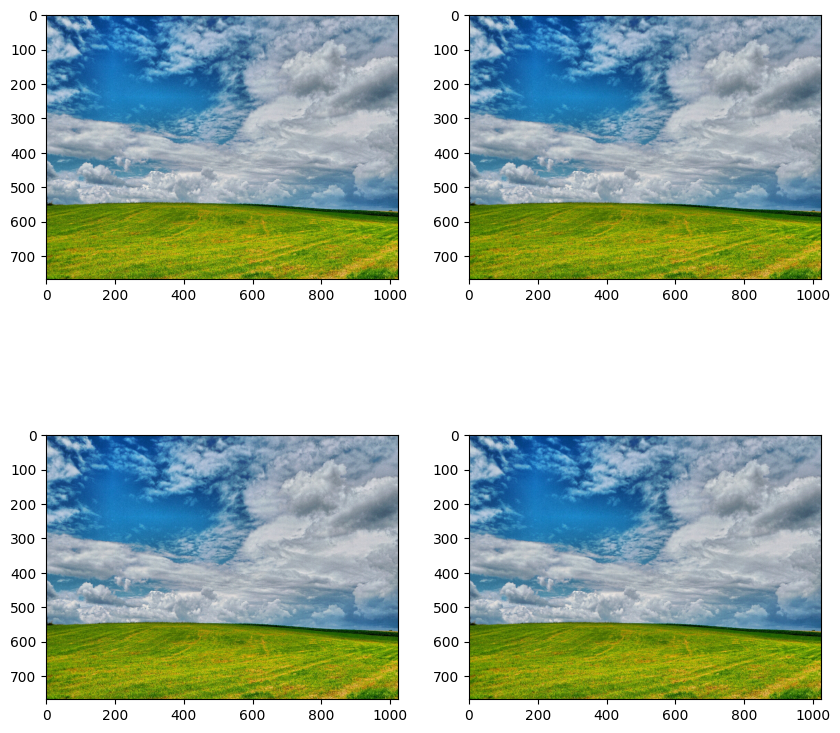

In [21]:

down_image = space_to_depth(image, 2)
print(image.shape, down_image.shape)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    axs[i//2, i%2].imshow(down_image[:, :, i*3:i*3+3])

(1536, 2048, 3)


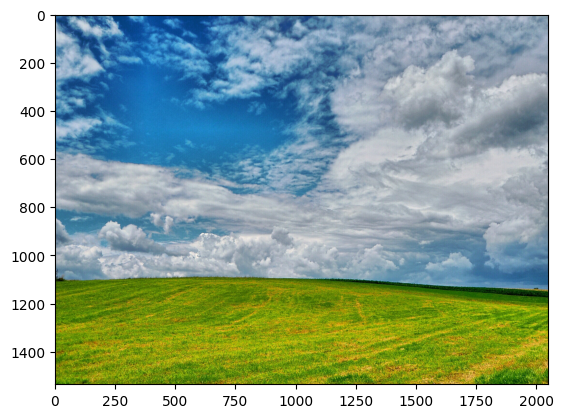

In [22]:
up_image = depth_to_space(down_image, 2)
print(up_image.shape)
plt.imshow(up_image)

In [26]:
a = [1, 2,3]
print(a*2)

[1, 2, 3, 1, 2, 3]
